# Raspagem da lista de 2020

In [1]:
# Json import

import requests
import pandas as pd
import json
import os
from bs4 import BeautifulSoup
import re
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Fazendo o request da página da web

#URL = 'https://www.rollingstone.com/music/music-lists/500-greatest-albums-of-all-time-156826/little-richard-heres-little-richard-165415/'

#page = requests.get(URL)

#soup = BeautifulSoup(page.content)

In [3]:
# Buscando o texto pelo o id indicado

#script = soup.find('script', id = 'pmc-lists-front-js-extra').get_text()

#print(script)

In [4]:
######## https://jsonformatter.curiousconcept.com

In [5]:
#Buscando os nome de todos arquivos

arquivos = sorted(glob('Dados/rolling_stone/rs_2020_*.json'))
arquivos

['Dados/rolling_stone\\rs_2020_050_01.json',
 'Dados/rolling_stone\\rs_2020_100_51.json',
 'Dados/rolling_stone\\rs_2020_150_101.json',
 'Dados/rolling_stone\\rs_2020_200_151.json',
 'Dados/rolling_stone\\rs_2020_250_201.json',
 'Dados/rolling_stone\\rs_2020_300_251.json',
 'Dados/rolling_stone\\rs_2020_350_301.json',
 'Dados/rolling_stone\\rs_2020_400_351.json',
 'Dados/rolling_stone\\rs_2020_450_401.json',
 'Dados/rolling_stone\\rs_2020_500_451.json']

In [6]:
# Funções para limpar as descrições e para separar 

def clean_description(desc):
    clean_desc = desc.replace('<i>', '').replace('</i>', '')
    return re.sub(r'&#....', '', clean_desc)

#def split_comma(string):
#    return string.split(',', 1)

def clean_title_2020(string):
    artista, album = string.split(',', 1)
    return artista.strip(), album.strip()

album = {}
albuns = []

In [7]:
# Lendo os arquivos json e organizando os dados em uma lista de dicionarios

for arquivo_json in arquivos:
    with open(arquivo_json) as json_data:
        data = json.load(json_data)
        for i in range (0, 50):
            item = data['gallery'][i]
            album['Posição'] = item['positionDisplay']
            album['Artista'], album['Album'] = clean_title_2020(item['title'])
            album['Gravadora'], album['Ano'] = item['subtitle'].split(',', 1)
            album['Descrição'] = clean_description(re.findall(r'<p>(.+?)</p>', item['description'])[0])
            albuns.append(album.copy())
        

In [8]:
albuns

[{'Posição': 50,
  'Artista': 'Jay-Z',
  'Album': "'The Blueprint'",
  'Gravadora': 'Roc-A-Fella',
  'Ano': ' 2001',
  'Descrição': 'With The Blueprint, Jay-Z took on anyone and everyone who wanted to sit on his throne, even the jesters. “Takeover,” one of rap’s most precise and unrelenting diss tracks, commits GBH on rappers Nas and Prodigy from Mobb Deep. When Hova isn’t taking shots at record executives, cops, critics, haters, biters, and his absent dad (and still, sadly, using the word “faggot”), he inches toward vulnerability on “Song Cry.” “Izzo (H.O.V.A.),” with dynamic production by Kanye West, gave him his first Top 10 single. Jay-Z elevates clever rhymes and innovations with an unmatched air of calm control and a cavalier confidence. Here’s the moral of the story, courtesy of “Takeover”: “You guys don’t want it with HOV.”'},
 {'Posição': 49,
  'Artista': 'OutKast',
  'Album': "'Aquemini'",
  'Gravadora': 'LaFace',
  'Ano': ' 1998',
  'Descrição': 'The title of OutKast’s third

In [9]:
# Organizando os álbuns pela posição no ranking

df_rs_2020 = pd.DataFrame.from_dict(albuns)

df_rs_2020.sort_values(by='Posição', inplace= True)

In [10]:
df_rs_2020

,Posição,Artista,Album,Gravadora,Ano,Descrição
49,1,Marvin Gaye,'What's Going On',Tamla/Motown,1971,Marvin Gaye;s masterpiece began as a reaction ...
48,2,The Beach Boys,'Pet Sounds',Capitol,1966,“Who’s gonna hear this shit?” Beach Boys singe...
47,3,Joni Mitchell,'Blue',Reprise,1971,"In 1971, Joni Mitchell represented the West Co..."
46,4,Stevie Wonder,'Songs in the Key of Life',Tamla/Motown,1976,Months before the recording sessions for Songs...
45,5,The Beatles,'Abbey Road',Apple,1969,"“It was a very happy record,” said producer Ge..."
...,...,...,...,...,...,...
454,496,Shakira,'Dónde Están los Ladrones',Columbia,1998,Long before she went blond and took her never-...
453,497,Various Artists,'The Indestructible Beat of Soweto',Earthworks,1985,The greatest album ever to be marketed under t...
452,498,Suicide,'Suicide',Red Star,1977,These New York synth-punks evoke everything fr...
451,499,Rufus,"Chaka Khan, 'Ask Rufus'",ABC,1977,"Fronted by Chaka Khan, one of soul music’s mos..."


In [11]:
# Função para limpar o data frame

def clean_df(df):
    df.reset_index(inplace=True)
    df.drop(columns='index', inplace=True)
    df['Ano'] = df.Ano.apply(lambda x: x.replace(',', ''))
    df['Ano'] =  df.Ano.astype(int)
    return df

df_rs_2020 = clean_df(df_rs_2020)

In [12]:
df_rs_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Posição      500 non-null int64
Artista      500 non-null object
Album        500 non-null object
Gravadora    500 non-null object
Ano          500 non-null int32
Descrição    500 non-null object
dtypes: int32(1), int64(1), object(4)
memory usage: 21.6+ KB


In [13]:
# Buscando outlier 

df_rs_2020[df_rs_2020['Ano'] == 19755]

,Posição,Artista,Album,Gravadora,Ano,Descrição
337,338,Brian Eno,'Another Green World',Island,19755,After years as a rock eccentric with Roxy Musi...


In [14]:
# Corrigindo outlier

df_rs_2020.at[337, 'Ano'] = 1975

In [15]:
df_rs_2020.describe()

,Posição,Ano
count,500.000000,500.000000
mean,250.500000,1984.184000
std,144.481833,14.943787
min,1.000000,1955.000000
25%,125.750000,1971.000000
50%,250.500000,1980.000000
75%,375.250000,1995.000000
max,500.000000,2019.000000


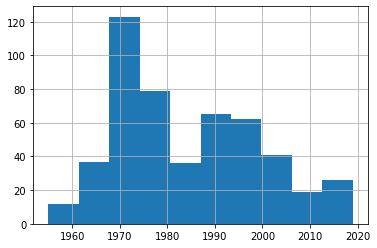

In [16]:
df_rs_2020.Ano.hist()
plt.ylabel('Nº álbuns]')
plt.xlabel('Ano')
plt.title('Nº de álbuns por ano')
plt.show()

In [17]:
#Visualizando artistas que maior número de álbuns

df_rs_2020.Artista.value_counts().head(30)

The Beatles               9
Bob Dylan                 7
The Rolling Stones        6
Kanye West                6
Neil Young                6
Led Zeppelin              5
David Bowie               5
Bruce Springsteen         5
Joni Mitchell             4
Pink Floyd                4
Radiohead                 4
The Who                   4
Aretha Franklin           4
The Velvet Underground    4
Stevie Wonder             4
Marvin Gaye               3
Pavement                  3
Kendrick Lamar            3
Prince                    3
James Brown               3
The Beach Boys            3
Beastie Boys              3
Big Star                  3
Nirvana                   3
The Clash                 3
OutKast                   3
Fiona Apple               3
Michael Jackson           3
Madonna                   3
Jay-Z                     3
Name: Artista, dtype: int64

In [18]:
#Visualizando gravadora que maior número de álbuns

df_rs_2020.Gravadora.value_counts()

Columbia             49
Warner Bros.         22
Epic                 19
Atlantic             19
Island               17
                     ..
Private Stock         1
Go! Beat              1
Cotillion             1
E.G./Warner Bros.     1
EMI Manhattan         1
Name: Gravadora, Length: 170, dtype: int64

# Lista de 2012

In [19]:
# Abrir arquivos da lista antiga
#Buscando os nome de todos arquivos
arquivos = sorted(glob('Dados/rolling_stone/rs_old*.json'))
arquivos

['Dados/rolling_stone\\rs_old_050_01.json',
 'Dados/rolling_stone\\rs_old_100_051.json',
 'Dados/rolling_stone\\rs_old_150_101.json',
 'Dados/rolling_stone\\rs_old_200_151.json',
 'Dados/rolling_stone\\rs_old_250_201.json',
 'Dados/rolling_stone\\rs_old_300_251.json',
 'Dados/rolling_stone\\rs_old_350_301.json',
 'Dados/rolling_stone\\rs_old_400_351.json',
 'Dados/rolling_stone\\rs_old_450_401.json',
 'Dados/rolling_stone\\rs_old_500_451.json']

In [20]:
# Funções para limpar as descrições e para separar

def split_title(title):
    title_scrap = title.split(',', 1)
    titulo = title_scrap[0]
    if len(title_scrap) == 2:
        cd = title_scrap[1].strip()
    else:
        cd = None
    return titulo.strip(), cd

def split_desc(desc):
    desc_scrap = re.findall(r'<em>(.+?)</em>', desc)[0].split(',')
    gravadora = desc_scrap[0]
    if len(desc_scrap) == 2:
        ano = desc_scrap[1].strip()
    else:
        ano = None
    return gravadora, ano

def clean_desc_old(desc):
    text_array = re.findall(r'<p>(.+?)</p>', desc)
    if len(text_array) == 2:
        text = re.sub(r'<a(.+?) >', '', text_array[1])
    else:
        text = None
    return text

# Lendo os arquivos json e organizando os dados em uma lista de dicionarios

album = {}
albuns = []

for arquivo_json in arquivos:
    with open(arquivo_json) as json_data:
        data = json.load(json_data)
        for i in range (0, 50):
            item = data['gallery'][i]
            album['Posição'] = item['positionDisplay']
            album['Artista'], album['Album'] = split_title(item['title'])
            album['Gravadora'], album['Ano'] = split_desc(item['description'])
            #album['Gravadora'] = re.findall(r'<em>(.+?)</em>', item['description'])[0].split(',')[0]
            #album['Ano'] = re.findall(r'<em>(.+?)</em>', item['description'])[0].split(',')[1].strip()
            album['Descrição'] = clean_desc_old(item['description'])
            albuns.append(album.copy())

In [21]:
albuns

[{'Posição': 50,
  'Artista': 'Little Richard',
  'Album': "'Here's Little Richard'",
  'Gravadora': 'Specialty',
  'Ano': '1957',
  'Descrição': '&quot;I came from a family where my people didn&apos;t like rhythm &amp; blues,&quot; Little Richard</a> told <em>Rolling Stone</em> in 1970. &quot;Bing Crosby, &apos;Pennies From Heaven,&apos; Ella Fitzgerald was all I heard. And I knew there was something that could be louder than that, but didn&apos;t know where to find it. And I found it was me.&quot; Richard&apos;s raucous 1957 debut album collected singles such as &quot;Rip It Up&quot; and &quot;Long Tall Sally,&quot; in which his rollicking boogie-&#xAD;woogie piano and falsetto scream ignited the unfettered possibilities of rock &amp; roll. &quot;Tutti Frutti&quot; still contains what has to be considered the most inspired rock lyric ever recorded: &quot;A wop bop alu bop, a wop bam boom!&quot;'},
 {'Posição': 49,
  'Artista': 'The Allman Brothers Band',
  'Album': "'At Fillmore East

In [22]:
# Organizando os álbuns pela posição no ranking

df_rs_2012 = pd.DataFrame.from_dict(albuns)

df_rs_2012.sort_values(by='Posição', inplace= True)

In [23]:
df_rs_2012

,Posição,Artista,Album,Gravadora,Ano,Descrição
49,1,The Beatles,'Sgt. Pepper's Lonely Hearts Club Band',Capitol,1967,None
48,2,The Beach Boys,'Pet Sounds',Capitol,1966,None
47,3,The Beatles,'Revolver',Capitol,1966,None
46,4,Bob Dylan,'Highway 61 Revisited',Columbia,1965,None
45,5,The Beatles,'Rubber Soul',Capitol,1965,None
...,...,...,...,...,...,...
454,496,Boz Scaggs,'Boz Scaggs',Atlantic,1969,The stone-solid grooves on this underrated gem...
453,497,The White Stripes,'White Blood Cells',Sympathy for the Record Industry,2001,The third album by Jack and Meg White was the ...
452,498,The Stone Roses,'The Stone Roses',Silvertone,1989,"For a few glorious moments, the Stone Roses</a..."
451,499,B.B. King,'Live in Cook County Jail',ABC,1971,King</a> was enjoying a career renaissance whe...


In [24]:
df_rs_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 49 to 450
Data columns (total 6 columns):
Posição      500 non-null int64
Artista      500 non-null object
Album        499 non-null object
Gravadora    500 non-null object
Ano          497 non-null object
Descrição    489 non-null object
dtypes: int64(1), object(5)
memory usage: 27.3+ KB


In [25]:
# Buscando os valores os álbuns com valor nulo no campo Ano

df_rs_2012[pd.isna(df_rs_2012['Ano'])]

,Posição,Artista,Album,Gravadora,Ano,Descrição
298,252,Jay-Z,'The Blueprint',The Blueprint,None,None
371,379,TLC,'CrazySexyCool',TLC,None,None
492,458,Elton John,'Tumbleweed Connection',Dog Day Afternoon,None,None


In [26]:
# Inserindo o ano nos campos antes nulo

df_rs_2012.at[298, 'Ano'] = 2001
df_rs_2012.at[371, 'Ano'] = 1994
df_rs_2012.at[492, 'Ano'] = 1970

In [27]:
# Inserindo o album nos campos antes nulo

df_rs_2012.at[168, 'Album'] = 'Exodus'

In [28]:
def clean_df_2012(df):
    df.reset_index(inplace=True)
    df.drop(columns='index', inplace=True)
    #df['Ano'] = df.Ano.apply(lambda x: x.replace(',', ''))
    df['Ano'] =  df.Ano.astype(int)
    return df

In [29]:
df_rs_2012 = clean_df_2012(df_rs_2012)
df_rs_2012

,Posição,Artista,Album,Gravadora,Ano,Descrição
0,1,The Beatles,'Sgt. Pepper's Lonely Hearts Club Band',Capitol,1967,None
1,2,The Beach Boys,'Pet Sounds',Capitol,1966,None
2,3,The Beatles,'Revolver',Capitol,1966,None
3,4,Bob Dylan,'Highway 61 Revisited',Columbia,1965,None
4,5,The Beatles,'Rubber Soul',Capitol,1965,None
...,...,...,...,...,...,...
495,496,Boz Scaggs,'Boz Scaggs',Atlantic,1969,The stone-solid grooves on this underrated gem...
496,497,The White Stripes,'White Blood Cells',Sympathy for the Record Industry,2001,The third album by Jack and Meg White was the ...
497,498,The Stone Roses,'The Stone Roses',Silvertone,1989,"For a few glorious moments, the Stone Roses</a..."
498,499,B.B. King,'Live in Cook County Jail',ABC,1971,King</a> was enjoying a career renaissance whe...


In [30]:
df_rs_2012.describe()

,Posição,Ano
count,500.000000,500.000000
mean,250.500000,1979.168000
std,144.481833,12.157441
min,1.000000,1952.000000
25%,125.750000,1970.000000
50%,250.500000,1976.000000
75%,375.250000,1988.000000
max,500.000000,2011.000000


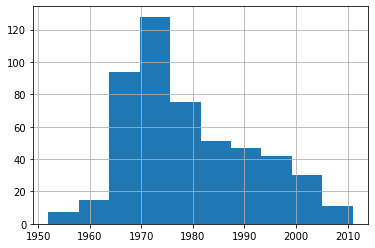

In [31]:
df_rs_2012.Ano.hist()
plt.ylabel('Nº álbuns]')
plt.xlabel('Ano')
plt.title('Nº de álbuns por ano')
plt.show()

In [32]:
df_rs_2012.Artista.value_counts().head(30)

The Rolling Stones             10
The Beatles                    10
Bob Dylan                      10
Bruce Springsteen               8
The Who                         7
Led Zeppelin                    5
David Bowie                     5
U2                              5
Elton John                      5
Radiohead                       5
Pink Floyd                      4
Sly and the Family Stone        4
Stevie Wonder                   4
The Byrds                       4
The Smiths                      4
Various Artists                 4
Talking Heads                   4
The Police                      4
Grateful Dead                   4
The Velvet Underground          3
The Beach Boys                  3
Randy Newman                    3
Bob Marley and the Wailers      3
Miles Davis                     3
Michael Jackson                 3
Madonna                         3
Jay-Z                           3
Tom Waits                       3
The Clash                       3
The Jimi Hendr

In [33]:
df_rs_2012[df_rs_2012.Artista == 'Kanye West']

,Posição,Artista,Album,Gravadora,Ano,Descrição
117,118,Kanye West,'Late Registration',Roc-A-Fella/Def Jam,2005,"Here, Kanye</a> really started showing off. Ra..."
297,298,Kanye West,'The College Dropout',Roc-A-Fella,2004,"On his debut, the self-proclaimed &quot;first ..."
352,353,Kanye West,'My Beautiful Dark Twisted Fantasy',Def Jam/Roc-A-Fella,2010,Epic hip-hop as messily inspired as Kanye</a>&...


In [34]:
df_rs_2020[df_rs_2020.Artista == 'Kanye West']

,Posição,Artista,Album,Gravadora,Ano,Descrição
16,17,Kanye West,'My Beautiful Dark Twisted Fantasy',Roc-A-Fella,2010,Our relationship with Kanye West was still in ...
73,74,Kanye West,'The College Dropout',Roc-A-Fella,2004,"In 2003, Kanye West was a Chicago kid who’d pr..."
116,117,Kanye West,'Late Registration',Roc-A-Fella,2005,The College Dropout introduced the world to a ...
203,204,Kanye West,'Graduation',Roc-A-Fella,2007,";I;m doin; pretty good as far as geniuses go,;..."
243,244,Kanye West,'808s &amp; Heartbreak',Roc-A-Fella,2008,"Part of Kanye West died in the fall of 2007, w..."
268,269,Kanye West,'Yeezus',Roc-A-Fella,2013,"“No one’s near doing what he’s doing,” said Lo..."


In [35]:
df_rs_2012

,Posição,Artista,Album,Gravadora,Ano,Descrição
0,1,The Beatles,'Sgt. Pepper's Lonely Hearts Club Band',Capitol,1967,None
1,2,The Beach Boys,'Pet Sounds',Capitol,1966,None
2,3,The Beatles,'Revolver',Capitol,1966,None
3,4,Bob Dylan,'Highway 61 Revisited',Columbia,1965,None
4,5,The Beatles,'Rubber Soul',Capitol,1965,None
...,...,...,...,...,...,...
495,496,Boz Scaggs,'Boz Scaggs',Atlantic,1969,The stone-solid grooves on this underrated gem...
496,497,The White Stripes,'White Blood Cells',Sympathy for the Record Industry,2001,The third album by Jack and Meg White was the ...
497,498,The Stone Roses,'The Stone Roses',Silvertone,1989,"For a few glorious moments, the Stone Roses</a..."
498,499,B.B. King,'Live in Cook County Jail',ABC,1971,King</a> was enjoying a career renaissance whe...


In [36]:
df_rs_2020

,Posição,Artista,Album,Gravadora,Ano,Descrição
0,1,Marvin Gaye,'What's Going On',Tamla/Motown,1971,Marvin Gaye;s masterpiece began as a reaction ...
1,2,The Beach Boys,'Pet Sounds',Capitol,1966,“Who’s gonna hear this shit?” Beach Boys singe...
2,3,Joni Mitchell,'Blue',Reprise,1971,"In 1971, Joni Mitchell represented the West Co..."
3,4,Stevie Wonder,'Songs in the Key of Life',Tamla/Motown,1976,Months before the recording sessions for Songs...
4,5,The Beatles,'Abbey Road',Apple,1969,"“It was a very happy record,” said producer Ge..."
...,...,...,...,...,...,...
495,496,Shakira,'Dónde Están los Ladrones',Columbia,1998,Long before she went blond and took her never-...
496,497,Various Artists,'The Indestructible Beat of Soweto',Earthworks,1985,The greatest album ever to be marketed under t...
497,498,Suicide,'Suicide',Red Star,1977,These New York synth-punks evoke everything fr...
498,499,Rufus,"Chaka Khan, 'Ask Rufus'",ABC,1977,"Fronted by Chaka Khan, one of soul music’s mos..."


In [37]:
df_rs_2012.Artista.value_counts().head(20)

The Rolling Stones          10
The Beatles                 10
Bob Dylan                   10
Bruce Springsteen            8
The Who                      7
Led Zeppelin                 5
David Bowie                  5
U2                           5
Elton John                   5
Radiohead                    5
Pink Floyd                   4
Sly and the Family Stone     4
Stevie Wonder                4
The Byrds                    4
The Smiths                   4
Various Artists              4
Talking Heads                4
The Police                   4
Grateful Dead                4
The Velvet Underground       3
Name: Artista, dtype: int64

In [38]:
df_rs_2020.Artista.value_counts().head(20)

The Beatles               9
Bob Dylan                 7
The Rolling Stones        6
Kanye West                6
Neil Young                6
Led Zeppelin              5
David Bowie               5
Bruce Springsteen         5
Joni Mitchell             4
Pink Floyd                4
Radiohead                 4
The Who                   4
Aretha Franklin           4
The Velvet Underground    4
Stevie Wonder             4
Marvin Gaye               3
Pavement                  3
Kendrick Lamar            3
Prince                    3
James Brown               3
Name: Artista, dtype: int64

In [ ]:
all_albuns = df_rs_2012.Album.append(df_rs_2020.Album)
all_albuns = all_albuns.reset_index()

In [ ]:
all_albuns.drop(columns = 'index', inplace = True)
all_albuns

In [68]:
all_albuns

,Album
0,'Sgt. Pepper's Lonely Hearts Club Band'
1,'Pet Sounds'
2,'Revolver'
3,'Highway 61 Revisited'
4,'Rubber Soul'
...,...
995,'Dónde Están los Ladrones'
996,'The Indestructible Beat of Soweto'
997,'Suicide'
998,"Chaka Khan, 'Ask Rufus'"


In [70]:
len(all_albuns['Album'].unique())

unique_albuns = all_albuns['Album'].unique()

703

In [71]:
#df_rs_old.set_index('Posição', inplace=True)
#df_rs_2020.set_index('Posição', inplace=True)

album_key = {}
albuns_count = []

for album in unique_albuns:
    album_key['Album'] = album
    album_key['Lista 2012'] = df_rs_2012[df_rs_2012.Album == album]['Posição'].values
    album_key['Lista 2020'] = df_rs_2020[df_rs_2020.Album == album]['Posição'].values
    albuns_count.append(album_key.copy())

In [72]:
albuns_count

[{'Album': "'Sgt. Pepper's Lonely Hearts Club Band'",
  'Lista 2012': array([1], dtype=int64),
  'Lista 2020': array([24], dtype=int64)},
 {'Album': "'Pet Sounds'",
  'Lista 2012': array([2], dtype=int64),
  'Lista 2020': array([2], dtype=int64)},
 {'Album': "'Revolver'",
  'Lista 2012': array([3], dtype=int64),
  'Lista 2020': array([11], dtype=int64)},
 {'Album': "'Highway 61 Revisited'",
  'Lista 2012': array([4], dtype=int64),
  'Lista 2020': array([18], dtype=int64)},
 {'Album': "'Rubber Soul'",
  'Lista 2012': array([5], dtype=int64),
  'Lista 2020': array([35], dtype=int64)},
 {'Album': "'What's Going On'",
  'Lista 2012': array([6], dtype=int64),
  'Lista 2020': array([1], dtype=int64)},
 {'Album': "'Exile on Main Street'",
  'Lista 2012': array([7], dtype=int64),
  'Lista 2020': array([14], dtype=int64)},
 {'Album': "'London Calling'",
  'Lista 2012': array([8], dtype=int64),
  'Lista 2020': array([16], dtype=int64)},
 {'Album': "'Blonde on Blonde'",
  'Lista 2012': array([9],

In [75]:
#df_albuns_count = pd.DataFrame.from_dict(albuns_count)
df_albuns_count.head(100)

,Album,Lista 2012,Lista 2020
0,'Sgt. Pepper's Lonely Hearts Club Band',[1],[24]
1,'Pet Sounds',[2],[2]
2,'Revolver',[3],[11]
3,'Highway 61 Revisited',[4],[18]
4,'Rubber Soul',[5],[35]
...,...,...,...
95,'The Freewheelin' Bob Dylan',[97],[255]
96,'This Year's Model',[98],[]
97,'There's a Riot Goin' On',[99],[]
98,'Odessey and Oracle',[100],[243]


In [46]:
df_albuns_count['Lista 2012'][0] - df_albuns_count['Lista 2020'][0]

array([], dtype=int64)

In [47]:
df_albuns_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 3 columns):
Album         704 non-null object
Lista 2012    705 non-null object
Lista 2020    705 non-null object
dtypes: object(3)
memory usage: 16.6+ KB


In [48]:
df_rs_2012

,Posição,Artista,Album,Gravadora,Ano,Descrição
0,1,The Beatles,'Sgt. Pepper's Lonely Hearts Club Band',Capitol,1967,None
1,2,The Beach Boys,'Pet Sounds',Capitol,1966,None
2,3,The Beatles,'Revolver',Capitol,1966,None
3,4,Bob Dylan,'Highway 61 Revisited',Columbia,1965,None
4,5,The Beatles,'Rubber Soul',Capitol,1965,None
...,...,...,...,...,...,...
495,496,Boz Scaggs,'Boz Scaggs',Atlantic,1969,The stone-solid grooves on this underrated gem...
496,497,The White Stripes,'White Blood Cells',Sympathy for the Record Industry,2001,The third album by Jack and Meg White was the ...
497,498,The Stone Roses,'The Stone Roses',Silvertone,1989,"For a few glorious moments, the Stone Roses</a..."
498,499,B.B. King,'Live in Cook County Jail',ABC,1971,King</a> was enjoying a career renaissance whe...


In [82]:
#df_rs_2020[df_rs_2020['Artista'] == 'Jimi Hendrix']
df_rs_2012[df_rs_2012['Artista'] == 'The Jimi Hendrix Experience']
#df_rs_2012['Artista']

,Posição,Artista,Album,Gravadora,Ano,Descrição
14,15,The Jimi Hendrix Experience,'Are You Experienced?',Reprise,1967,This is what Britain sounded like in late 1966...
54,55,The Jimi Hendrix Experience,'Electric Ladyland',Reprise,1968,Hendrix</a>&apos;s third album was the first h...
82,83,The Jimi Hendrix Experience,'Axis: Bold as Love',Reprise,1968,Jimi Hendrix</a>&apos;s first album remade roc...


In [85]:
df_rs_2020[df_rs_2020['Artista'] == 'Jimi Hendrix']

,Posição,Artista,Album,Gravadora,Ano,Descrição
29,30,Jimi Hendrix,'Are You Experienced',Track,1967,This is what Britain sounded like in late 1966...
52,53,Jimi Hendrix,'Electric Ladyland',Reprise,1968,Jimi Hendrix’s third album was the first he pr...


In [51]:
df_rs_2012['Album'][4].index

<function str.index>

In [52]:
df_concat = pd.concat([df_rs_2012, df_rs_2020], axis = 1)
df_concat.rename(columns = {})

,Posição,Artista,Album,Gravadora,Ano,Descrição,Posição,Artista,Album,Gravadora,Ano,Descrição
0,1,The Beatles,'Sgt. Pepper's Lonely Hearts Club Band',Capitol,1967,None,1,Marvin Gaye,'What's Going On',Tamla/Motown,1971,Marvin Gaye;s masterpiece began as a reaction ...
1,2,The Beach Boys,'Pet Sounds',Capitol,1966,None,2,The Beach Boys,'Pet Sounds',Capitol,1966,“Who’s gonna hear this shit?” Beach Boys singe...
2,3,The Beatles,'Revolver',Capitol,1966,None,3,Joni Mitchell,'Blue',Reprise,1971,"In 1971, Joni Mitchell represented the West Co..."
3,4,Bob Dylan,'Highway 61 Revisited',Columbia,1965,None,4,Stevie Wonder,'Songs in the Key of Life',Tamla/Motown,1976,Months before the recording sessions for Songs...
4,5,The Beatles,'Rubber Soul',Capitol,1965,None,5,The Beatles,'Abbey Road',Apple,1969,"“It was a very happy record,” said producer Ge..."
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Boz Scaggs,'Boz Scaggs',Atlantic,1969,The stone-solid grooves on this underrated gem...,496,Shakira,'Dónde Están los Ladrones',Columbia,1998,Long before she went blond and took her never-...
496,497,The White Stripes,'White Blood Cells',Sympathy for the Record Industry,2001,The third album by Jack and Meg White was the ...,497,Various Artists,'The Indestructible Beat of Soweto',Earthworks,1985,The greatest album ever to be marketed under t...
497,498,The Stone Roses,'The Stone Roses',Silvertone,1989,"For a few glorious moments, the Stone Roses</a...",498,Suicide,'Suicide',Red Star,1977,These New York synth-punks evoke everything fr...
498,499,B.B. King,'Live in Cook County Jail',ABC,1971,King</a> was enjoying a career renaissance whe...,499,Rufus,"Chaka Khan, 'Ask Rufus'",ABC,1977,"Fronted by Chaka Khan, one of soul music’s mos..."


In [53]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [54]:
#df_rs_2012['Album'][0] == df_rs_2020['Album'][23
similar(df_rs_2012['Album'][0], df_rs_2020['Album'][23])

0.9743589743589743

In [55]:
similar(df_rs_2012['Album'][9], df_rs_2020['Album'][28])

0.8666666666666667

In [56]:
similar('Led Zeppelin I', 'Led Zeppelin II')

0.9655172413793104

In [59]:
#White Album - Sgt Peppers - Are You Experienced - Jmi Hendirx Company

df_rs_2012.at[9, 'Album'] = df_rs_2020['Album'][28]
df_rs_2020.at[23, 'Album'] = df_rs_2012['Album'][0]
df_rs_2012['Album'][9]

"'White Album'"

In [65]:
df_rs_2020[23, 'Album']

"'Sgt. Pepper's Lonely Hearts Club Band'"